<a href="https://colab.research.google.com/github/shivanswamynathan/ML/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, silhouette_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
data = pd.read_csv('heart_disease_uci.csv')
data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


Data preprocessing


In [75]:
data.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


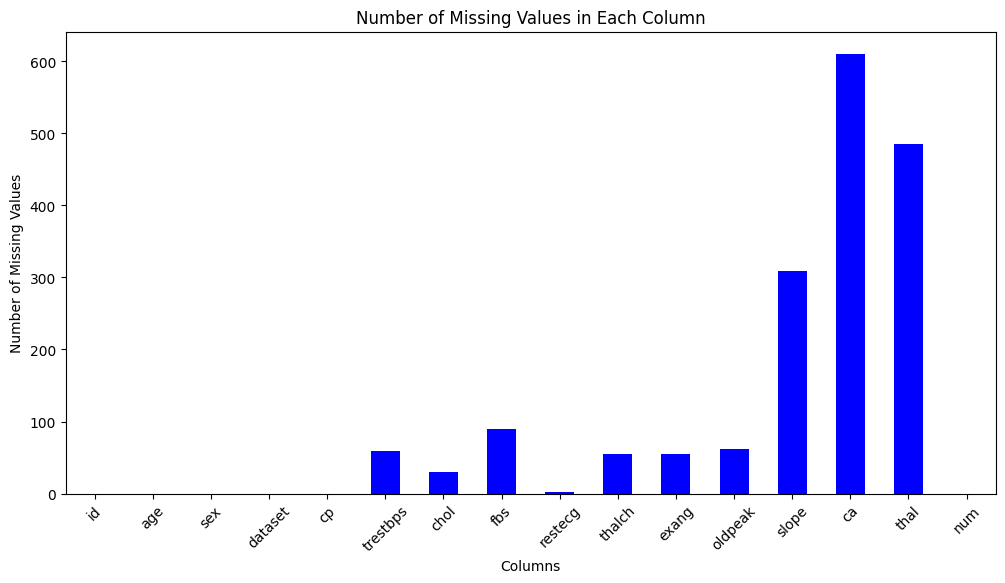

In [77]:
# Calculate the number of missing values in each column
missing_values = data.isnull().sum()

# Plotting the missing values
plt.figure(figsize=(12, 6))
missing_values.plot(kind='bar', color='blue')
plt.title('Number of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

In [79]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [80]:
numerical_cols = data.select_dtypes(include=['number']).columns
numerical_cols

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')

In [82]:
# Fill missing values in numerical columns with the mean
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

# Fill missing values in categorical columns with the mode
for col in categorical_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Verify if there are any remaining missing values
print(data.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


<ipython-input-82-2c3b9618c390>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(data[col].mode()[0])


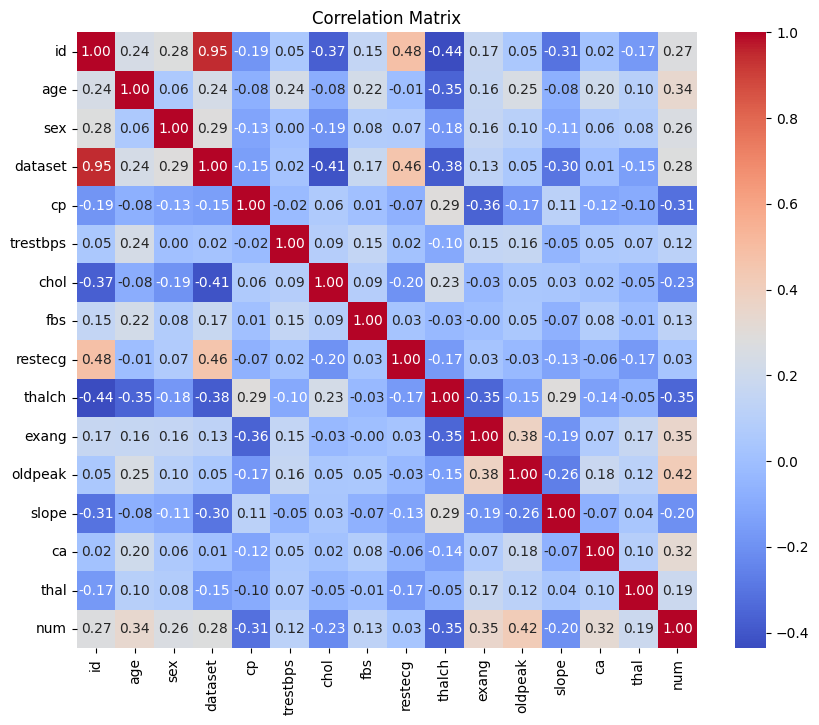

In [114]:
correlation_matrix = data.corr()

# Step 2: Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size for better visibility
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [87]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = LabelEncoder().fit_transform(data[col])

In [88]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [89]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [90]:
from sklearn.preprocessing import StandardScaler

# Initialize a dictionary to store evaluation metrics for each algorithm
evaluation_metrics = {}

# Initialize a StandardScaler object and fit to training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [91]:
#Logistic Regression
log_reg = LogisticRegression(penalty='l2', solver='lbfgs',random_state=0)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
log_reg_acc

0.45652173913043476

In [93]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = accuracy_score(y_test, y_pred_knn)

In [94]:
knn_acc

0.5217391304347826

In [95]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
kmeans_silhouette = silhouette_score(X, kmeans_labels)

In [96]:
kmeans_silhouette

0.5382641967937274

In [102]:
# Hyperparameter Tuning for KNN
param_grid = {'n_neighbors': range(1, 15)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
best_knn_acc = accuracy_score(y_test, best_knn.predict(X_test))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [103]:
best_knn_acc

0.532608695652174

In [104]:
#  Compare Results
results = {
    "Logistic Regression Accuracy": log_reg_acc,
    "KNN Accuracy": knn_acc,
    "Best KNN Accuracy (after tuning)": best_knn_acc,
    "K-Means  Score": kmeans_silhouette,

}

In [105]:
print("Results:")
for model, score in results.items():
    print(f"{model}: {score:.2f}")

Results:
Logistic Regression Accuracy: 0.46
KNN Accuracy: 0.52
Best KNN Accuracy (after tuning): 0.53
K-Means Silhouette Score: 0.54


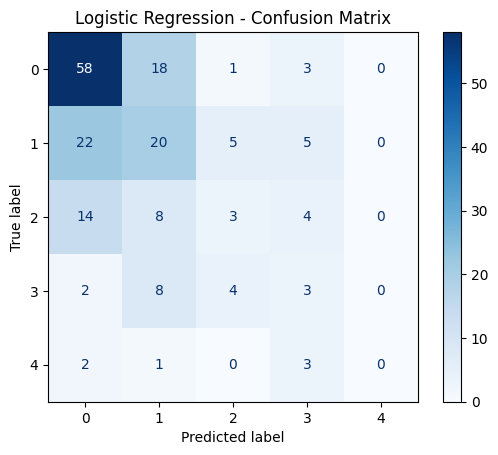

In [106]:
# Logistic Regression: Confusion Matrix
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

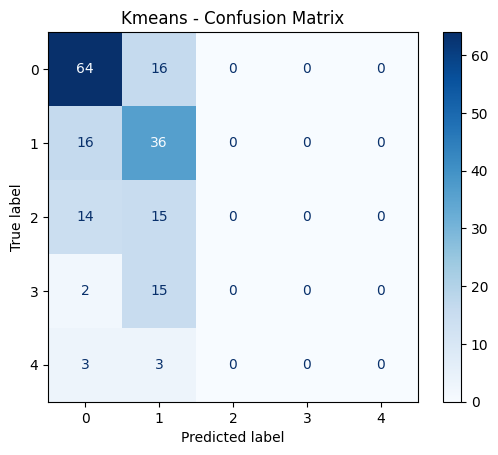

In [113]:
# Kmeans: Confusion Matrix
kmeans_labels_test = kmeans.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, kmeans_labels_test, cmap='Blues')
plt.title("Kmeans - Confusion Matrix")
plt.show()

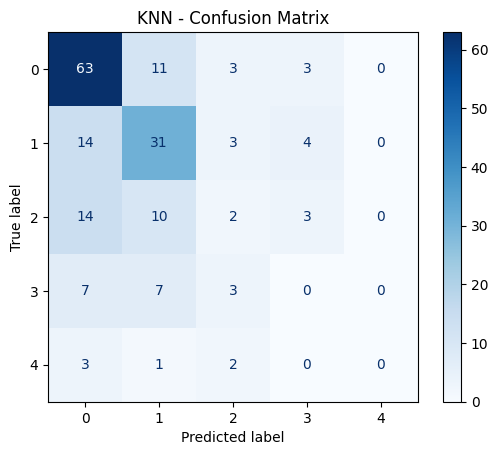

In [107]:
# KNN: Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap='Blues')
plt.title("KNN - Confusion Matrix")
plt.show()

In [110]:
# Model Comparison Bar Plot
model_names = list(results.keys())
model_scores = list(results.values())

<ipython-input-111-4cd346e807ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_scores, y=model_names, palette="viridis")


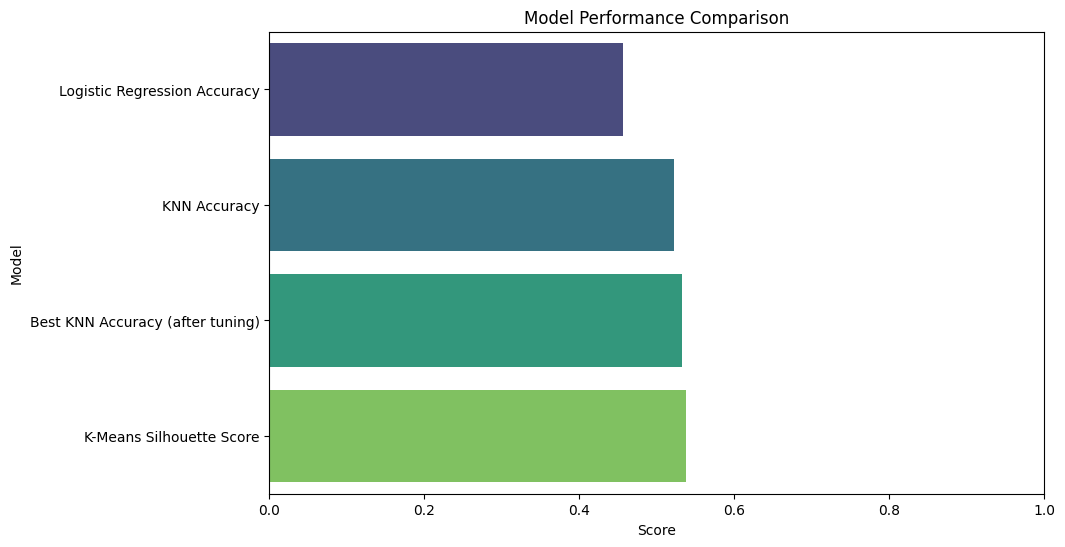

In [111]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_scores, y=model_names, palette="viridis")
plt.xlabel("Score")
plt.ylabel("Model")
plt.title("Model Performance Comparison")
plt.xlim(0, 1)  # Accuracy and silhouette scores are between 0 and 1
plt.show()